#**Natural Language Processing**


# 1 - Data Preprocessing

## 1.1. Download Dataset

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1vF3FqgBC1Y-RPefeVmY8zetdZG1jmHzT'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('imdb_train.csv')

id = '1XhaV8YMuQeSwozQww8PeyiWMJfia13G6'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('imdb_test.csv')

import pandas as pd
df_train = pd.read_csv("imdb_train.csv")
df_test = pd.read_csv("imdb_test.csv")

reviews_train = df_train['review'].tolist()
sentiments_train = df_train['sentiment'].tolist()
reviews_test = df_test['review'].tolist()
sentiments_test = df_test['sentiment'].tolist()

print("Training set number:",len(reviews_train))
print("Testing set number:",len(reviews_test))

Training set number: 25000
Testing set number: 25000


## 1.2. Preprocess data

In the preprocessing stage, the following steps will be implemented:

1. Case-folding 
2. Punctuation removal
3. Tokenisation
4. Stopwords removal
5. Lemmatisation
6. Stemming


In [ ]:
# Firstly have a look at the raw data
df_train.head()

,review,sentiment
0,I enjoyed this movie. Haven't seen Andy Griffi...,pos
1,The whole does not even come close to the sum ...,pos
2,I'd never seen an independent movie and I was ...,pos
3,This unpleasant film has little to recommend i...,neg
4,It was meant to be a parody on the LOTR-Trilog...,neg


It is easy to see that this dataframe `df_train` only contains two columns, one column for text - `review` and the other column is the label - `sentiment`.

We can firstly split text and labels then  apply above 6 steps to the texts.

In [ ]:
def split_text_and_label(dataframe):
  """Split text and label for given dataframe."""
  text = dataframe['review'].tolist()
  label = dataframe['sentiment'].tolist()
  return text, label

train_text, train_label = split_text_and_label(df_train)
test_text, test_label = split_text_and_label(df_test)

print(f'Length of train text={len(train_text)}, length of train label={len(train_label)}')
print(f'Length of test text={len(test_text)}, length of test label={len(test_label)}')
print(train_label[:2])
print(test_label[:2])
train_text[0]

Length of train text=25000, length of train label=25000
Length of test text=25000, length of test label=25000
['pos', 'pos']
['pos', 'neg']


'I enjoyed this movie. Haven\'t seen Andy Griffith in ages and felt he fit this role perfectly. I\'ve associated him with comedy but am pleased to see that he\'s versatile.<br /><br />I wasn\'t troubled that Dotty\'s "anxiety disorder" may not have been verbatim from a psychiatric textbook. There are zillions of whatever-phobias and neuroses, and these can take on a broad variety of quantitative and qualitative forms. She is clearly a sensitive with extra-sensory powers as was understood by the local Indians but not by any Anglos. It is not surprising that this character is vulnerable and nominally eccentric.<br /><br />Although this is taken to be a light "family movie", it is actually more sophisticated than it seems. Also, Hiram\'s twist at the end came as a pleasant surprise to me and tied all the preceding action together in a bundle. It\'s fun to contemplate the possibility of such spiritual guidance.'

### 1.2.1 Punctuation Removal

In [ ]:
import string

def remove_punctuation(s):
  """Remove punctuation in string s."""
  return s.translate(str.maketrans('', '', string.punctuation))

train_text = [remove_punctuation(s) for s in train_text]
test_text = [remove_punctuation(s) for s in test_text]

train_text[0]

'I enjoyed this movie Havent seen Andy Griffith in ages and felt he fit this role perfectly Ive associated him with comedy but am pleased to see that hes versatilebr br I wasnt troubled that Dottys anxiety disorder may not have been verbatim from a psychiatric textbook There are zillions of whateverphobias and neuroses and these can take on a broad variety of quantitative and qualitative forms She is clearly a sensitive with extrasensory powers as was understood by the local Indians but not by any Anglos It is not surprising that this character is vulnerable and nominally eccentricbr br Although this is taken to be a light family movie it is actually more sophisticated than it seems Also Hirams twist at the end came as a pleasant surprise to me and tied all the preceding action together in a bundle Its fun to contemplate the possibility of such spiritual guidance'

### 1.2.2 Tokenisation

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

train_text = [word_tokenize(s) for s in train_text]
test_text = [word_tokenize(s) for s in test_text]

train_text[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I',
 'enjoyed',
 'this',
 'movie',
 'Havent',
 'seen',
 'Andy',
 'Griffith',
 'in',
 'ages',
 'and',
 'felt',
 'he',
 'fit',
 'this',
 'role',
 'perfectly',
 'Ive',
 'associated',
 'him',
 'with',
 'comedy',
 'but',
 'am',
 'pleased',
 'to',
 'see',
 'that',
 'hes',
 'versatilebr',
 'br',
 'I',
 'wasnt',
 'troubled',
 'that',
 'Dottys',
 'anxiety',
 'disorder',
 'may',
 'not',
 'have',
 'been',
 'verbatim',
 'from',
 'a',
 'psychiatric',
 'textbook',
 'There',
 'are',
 'zillions',
 'of',
 'whateverphobias',
 'and',
 'neuroses',
 'and',
 'these',
 'can',
 'take',
 'on',
 'a',
 'broad',
 'variety',
 'of',
 'quantitative',
 'and',
 'qualitative',
 'forms',
 'She',
 'is',
 'clearly',
 'a',
 'sensitive',
 'with',
 'extrasensory',
 'powers',
 'as',
 'was',
 'understood',
 'by',
 'the',
 'local',
 'Indians',
 'but',
 'not',
 'by',
 'any',
 'Anglos',
 'It',
 'is',
 'not',
 'surprising',
 'that',
 'this',
 'character',
 'is',
 'vulnerable',
 'and',
 'nominally',
 'eccentricbr',
 'br',
 'Altho

### 1.2.3 Stopwords Removal

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
from tqdm import tqdm

stop_words = sw.words()


def remove_stopwords(texts):
  """Remove stopwords in sentences of texts."""
  text_ns = []
  for tokens in tqdm(texts):
    filtered_tokens = [w for w in tokens if w not in stop_words]
    text_ns.append(filtered_tokens)
  return text_ns

train_text_ns = remove_stopwords(train_text)
test_text_ns = remove_stopwords(test_text)

train_text_ns[0]

  0%|          | 0/25000 [00:00<?, ?it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


100%|██████████| 25000/25000 [04:46<00:00, 87.16it/s]


['I',
 'enjoyed',
 'movie',
 'Havent',
 'seen',
 'Andy',
 'Griffith',
 'ages',
 'felt',
 'fit',
 'role',
 'perfectly',
 'Ive',
 'associated',
 'comedy',
 'pleased',
 'see',
 'hes',
 'versatilebr',
 'br',
 'I',
 'wasnt',
 'troubled',
 'Dottys',
 'anxiety',
 'disorder',
 'may',
 'verbatim',
 'psychiatric',
 'textbook',
 'There',
 'zillions',
 'whateverphobias',
 'neuroses',
 'broad',
 'variety',
 'quantitative',
 'qualitative',
 'forms',
 'She',
 'clearly',
 'sensitive',
 'extrasensory',
 'powers',
 'understood',
 'local',
 'Indians',
 'Anglos',
 'It',
 'surprising',
 'character',
 'vulnerable',
 'nominally',
 'eccentricbr',
 'br',
 'Although',
 'taken',
 'light',
 'family',
 'movie',
 'actually',
 'sophisticated',
 'seems',
 'Also',
 'Hirams',
 'twist',
 'came',
 'pleasant',
 'surprise',
 'tied',
 'preceding',
 'action',
 'together',
 'bundle',
 'Its',
 'fun',
 'contemplate',
 'possibility',
 'spiritual',
 'guidance']

### 1.2.4 Lemmatisation

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatise_words(texts):
  """Lemmatise words in texts."""
  text_le = []
  for tokens in tqdm(texts):
    lemma_tokens = [lemmatizer.lemmatize(w) for w in tokens]
    text_le.append(lemma_tokens)
  return text_le

train_text_le = lemmatise_words(train_text_ns)
test_text_le = lemmatise_words(test_text_ns)

# quick check
for i in range(15):
  print(train_text_ns[0][i], train_text_le[0][i])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


100%|██████████| 25000/25000 [00:13<00:00, 1794.26it/s]

I I
enjoyed enjoyed
movie movie
Havent Havent
seen seen
Andy Andy
Griffith Griffith
ages age
felt felt
fit fit
role role
perfectly perfectly
Ive Ive
associated associated
comedy comedy


### 1.2.5 Stemming


In [ ]:
from nltk.stem.porter import PorterStemmer
from tqdm.notebook import tqdm

stemmer = PorterStemmer()

def stemmatise_words(texts):
  """Stemmatise words in texts."""
  text_sm = []
  for tokens in tqdm(texts):
    stemm_tokens = [stemmer.stem(w) for w in tokens]
    text_sm.append(stemm_tokens)
  return text_sm

train_text_sm = stemmatise_words(train_text_le)
test_text_sm = stemmatise_words(test_text_le)

# quick check
for i in range(15):
  print(train_text_le[0][i], train_text_sm[0][i])


I I
enjoyed enjoy
movie movi
Havent havent
seen seen
Andy andi
Griffith griffith
age age
felt felt
fit fit
role role
perfectly perfectli
Ive ive
associated associ
comedy comedi


In [ ]:
# mount to my drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# save clean data to my drive
import pickle

# save model
file_clean_train = 'drive/My Drive/comp5046_clean_train.pkl'
file_clean_test = 'drive/My Drive/comp5046_clean_test.pkl'

print('Saving to', file_clean_train)
with open(file_clean_train, 'wb') as f:
  pickle.dump(train_text_sm, f)

print('Saving to', file_clean_test)
with open(file_clean_test, 'wb') as f:
  pickle.dump(test_text_sm, f)

Saving to drive/My Drive/comp5046_clean_train.pkl
Saving to drive/My Drive/comp5046_clean_test.pkl


# 2 - Model Implementation

## 2.1. Word Embeddings

The model I used for word embedding is SkipGram of FastText. 

FastText is more resilient to typo and error in words compared to Word2Vec hence FastText is my first preference when choosing word embedding model. 

There are two types of prediction based word representation - CBOW and Skip-gram. CBOW predicts center word from bag of context words while skip-gram predicts context words given center word. 

### 2.1.1. Data Preprocessing for Word Embeddings

*You are required to describe which preprocessing techniques were used with justification of your decision.*

**Important**: If you are going to use the code from lab3 word2vec preprocessing. Please note that `word_list = list(set(word_list)) ` has randomness. So to make sure the word_list is the same every time you run it, you can put `word_list.sort()` after that line of code.

In [ ]:
# load pre-saved clean train and test data
# mount to my drive
from google.colab import drive
drive.mount('/content/drive')

# save clean data to my drive
import pickle

# save model
file_clean_train = 'drive/My Drive/comp5046_clean_train.pkl'
file_clean_test = 'drive/My Drive/comp5046_clean_test.pkl'

print('Loading to', file_clean_train)
with open(file_clean_train, 'rb') as f:
  train_text_sm = pickle.load(f)

print('Loading to', file_clean_test)
with open(file_clean_test, 'rb') as f:
  test_text_sm = pickle.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading to drive/My Drive/comp5046_clean_train.pkl
Loading to drive/My Drive/comp5046_clean_test.pkl


#### 2.1.1.1 Build Vocabulary - A dictionary map word to index

In [ ]:
# make a dictionary to map word to integer
word_dict = {}
i = 0

def add_to_word_dict(word_dict, word, i):
  """Add word to word_dict if not exist."""
  if word in word_dict:
    return i
  else:
    word_dict[word] = i
    i += 1
  return i
    
# go through all words in training data and populate word_dict
for tokens in train_text_sm:
  for word in tokens:
      i = add_to_word_dict(word_dict, word, i)


# similarly, go through all words in test data and populate word_dict
for tokens in test_text_sm:
  for word in tokens:
    i = add_to_word_dict(word_dict, word, i)

# quick check
voc_size = len(word_dict)
print(f'Vocabulary size={voc_size}\nCheck the first 10 words in vocabulary:')
j = 0
for k, v in word_dict.items():
  print(f'  {k}: {v}')
  j += 1
  if j > 10:
    break

Vocabulary size=143366
Check the first 10 words in vocabulary:
  I: 0
  enjoy: 1
  movi: 2
  havent: 3
  seen: 4
  andi: 5
  griffith: 6
  age: 7
  felt: 8
  fit: 9
  role: 10


#### 2.1.1.2 Make Skip-gram with Window Size 1

In [ ]:
from tqdm.notebook import tqdm
unique_pairs = set()
skip_grams = []

def add_to_skipgram(word_dict, skip_grams, data, size=1):
  """Add pairs to skip grams given list of tokens and window size."""
  for tokens in tqdm(data):
    for i in range(1, len(tokens) - 1):
      str_target = tokens[i]
      str_context = [tokens[i - 1], tokens[i + 1]]
      target = word_dict[str_target]

      # skipgrams - (target, context[0]), (target, context[1])..
      for w in str_context:
        s_pair = f'{target} {w}'
        if s_pair not in unique_pairs:
          skip_grams.append([target, word_dict[w]])
          unique_pairs.add(s_pair)
      
# go through all words in training data and populate skip_gram
add_to_skipgram(word_dict, skip_grams, train_text_sm)

# go through all words in test data and populate skip_gram
add_to_skipgram(word_dict, skip_grams, test_text_sm)

# quick check
print(f'Skip gram size={len(skip_grams)}\nCheck the first 10 pairs in skip gram:')
inv_word_dict = {v:k for k, v in word_dict.items()}
for i in range(10):
  x, y = skip_grams[i]
  print(inv_word_dict[x], inv_word_dict[y])


Skip gram size=4988251
Check the first 10 pairs in skip gram:
enjoy I
enjoy movi
movi enjoy
movi havent
havent movi
havent seen
seen havent
seen andi
andi seen
andi griffith


### 2.1.2. Build Word Embeddings Model

**Define batch generation function**

In [ ]:
import numpy as np

def get_batch(data, size, iteration):
  """Return a batch of given size from skip gram."""
  batch_inputs = []
  batch_labels = []
  start_index = iteration * size
  end_index = (iteration + 1) * size
  for i in range(start_index, end_index):
    input_temp = [0] * voc_size
    input_temp[data[i][0]] = 1
    batch_inputs.append(input_temp)  # target
    batch_labels.append(data[i][1])  # context words

  return np.array(batch_inputs), np.array(batch_labels)

# quick check
size = 10
print(f'Try to get a batch of size={size} on iteration=0')
print(get_batch(skip_grams, size, 0))
print(f'Try to get a batch of size={size} on iteration=1')
print(get_batch(skip_grams, size, 1))


Try to get a batch of size=10 on iteration=0
(array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([0, 2, 1, 3, 2, 4, 3, 5, 4, 6]))
Try to get a batch of size=10 on iteration=1
(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([ 5,  7,  6,  8,  7,  9,  8, 10,  9, 11]))


**Define hyperparameters and word embedding model**

In [ ]:
import torch.nn as nn
import torch.optim as optim

learning_rate = 0.002
batch_size = 200
embedding_size = 25
no_of_epochs = 1000


class SkipGram(nn.Module):

  def __init__(self):
    super(SkipGram, self).__init__()
    self.linear1 = nn.Linear(voc_size, embedding_size, bias=False)
    self.linear2 = nn.Linear(embedding_size, voc_size, bias=False)

  def forward(self, x):
    hidden = self.linear1(x)
    out = self.linear2(hidden)
    return out

skip_gram_model = SkipGram()
criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(skip_gram_model.parameters(), lr=learning_rate)

### 2.1.3. Train Word Embeddings Model

Epoch: 0, loss: 11.8730, train_acc: 0.000
Epoch: 10, loss: 11.8732, train_acc: 0.000
Epoch: 20, loss: 11.8733, train_acc: 0.000
Epoch: 30, loss: 11.8725, train_acc: 0.000
Epoch: 40, loss: 11.8723, train_acc: 0.000
Epoch: 50, loss: 11.8727, train_acc: 0.000
Epoch: 60, loss: 11.8717, train_acc: 0.000
Epoch: 70, loss: 11.8687, train_acc: 0.000
Epoch: 80, loss: 11.8640, train_acc: 0.000
Epoch: 90, loss: 11.8543, train_acc: 0.000
Epoch: 100, loss: 11.8264, train_acc: 0.000
Epoch: 110, loss: 11.8020, train_acc: 0.010
Epoch: 120, loss: 11.7802, train_acc: 0.005
Epoch: 130, loss: 11.7640, train_acc: 0.010
Epoch: 140, loss: 11.7078, train_acc: 0.005
Epoch: 150, loss: 11.6734, train_acc: 0.000
Epoch: 160, loss: 11.6244, train_acc: 0.000
Epoch: 170, loss: 11.7264, train_acc: 0.005
Epoch: 180, loss: 11.6103, train_acc: 0.005
Epoch: 190, loss: 11.4029, train_acc: 0.000
Epoch: 200, loss: 11.6537, train_acc: 0.005
Epoch: 210, loss: 11.0289, train_acc: 0.010
Epoch: 220, loss: 11.0609, train_acc: 0.000

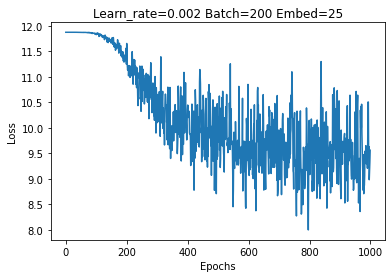

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pl
import torch

losses = []

for epoch in tqdm(range(no_of_epochs)):
    inputs,labels = get_batch(skip_grams, batch_size, epoch) # make batch every epoch
    inputs_torch = torch.from_numpy(inputs).float()
    labels_torch = torch.from_numpy(labels)

    # 1. zero grad
    optimiser.zero_grad()

    # 2. forword propagation
    outputs = skip_gram_model(inputs_torch)

    # 3. calculate loss
    loss = criterion(outputs, labels_torch)

    # 4. back propagation
    loss.backward()
    optimiser.step()
    
    losses.append(loss)
    if epoch % 10 == 0: 
        pred_outputs = skip_gram_model(inputs_torch)
        predicted = torch.argmax(outputs, 1)
        train_acc = accuracy_score(predicted.numpy(), labels)
        print('Epoch: %d, loss: %.4f, train_acc: %.3f' %(epoch, loss, train_acc))

pl.plot(range(no_of_epochs), losses)
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.title(f'Learn_rate={learning_rate} Batch={batch_size} Embed={embedding_size}')
pl.show()

#### 2.1.3.1 Justification on Hyperparameter Choices

I tuned the hyperparameter with several options. The following is the comparison of 4 different learning rate:
![alt text](https://)

In [ ]:
from scipy import spatial

weight1 = skip_gram_model.linear1.weight
trained_embeddings = weight1.detach().T.numpy()

test_words = ['love', 'like']

def compute_similarity_score(word1, word2):
  """Compute similarity score given two words and word embedding."""
  i1, i2 = word_dict[word1], word_dict[word2]
  embed1, embed2 = trained_embeddings[i1], trained_embeddings[i2]
  cos_sim = 1 - spatial.distance.cosine(embed1, embed2)
  return cos_sim


print(f'cosine similarity between love and like={compute_similarity_score("like", "love")}')
print(f'cosine similarity between love and hate={compute_similarity_score("hate", "love")}')


cosine similarity between love and like=0.2537938952445984
cosine similarity between love and hate=0.5115710496902466


### 2.1.4. Save Word Embeddings Model

In [ ]:
# mount to my drive
from google.colab import drive
drive.mount('/content/drive')

# save model
model_file_name = f'drive/My Drive/word_embedding_lr={learning_rate}_batch={batch_size}_embed={embedding_size}.pt'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
torch.save(skip_gram_model, model_file_name)

### 2.1.5. Load Word Embeddings Model

In [ ]:
import torch
# load model
saved_skip_gram_model = torch.load(model_file_name)
saved_skip_gram_model.eval()

SkipGram(
  (linear1): Linear(in_features=143366, out_features=25, bias=False)
  (linear2): Linear(in_features=25, out_features=143366, bias=False)
)

## 2.2. Character Embeddings

### 2.2.1. Data Preprocessing for Character Embeddings

In [ ]:
# load pre-saved clean train and test data
# mount to my drive
from google.colab import drive
drive.mount('/content/drive')

# save clean data to my drive
import pickle

# save model
file_clean_train = 'drive/My Drive/comp5046_clean_train.pkl'
file_clean_test = 'drive/My Drive/comp5046_clean_test.pkl'

print('Loading to', file_clean_train)
with open(file_clean_train, 'rb') as f:
  train_text_sm = pickle.load(f)

print('Loading to', file_clean_test)
with open(file_clean_test, 'rb') as f:
  test_text_sm = pickle.load(f)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Loading to drive/My Drive/comp5046_clean_train.pkl
Loading to drive/My Drive/comp5046_clean_test.pkl


#### 2.2.1.1 Define the chacater dictionary for later one-hot encoding

In [ ]:
import string

# consider the space of characters:

# all lower case character
char_lower = string.ascii_lowercase

# all upper case character
char_upper = string.ascii_uppercase

# all numbers 
char_num = '0123456789'

# all special symbols
char_special = [
  '¢', '£', '§', '©', '®', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê',
  'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ù', 'ú', 'û', 'ü','₤']

char_all = list(char_lower + char_upper + char_num) + char_special

print('Consider the following characters in one-hot encoding:')
print(char_all)

# define character to number for later one-hot encoding
char_to_num_dict = {n: i for i, n in enumerate(char_all)}
char_len = len(char_to_num_dict)
print(char_to_num_dict)
print(f'Char to num dictionary length (ont-hot encoding size)={char_len}')



Consider the following characters in one-hot encoding:
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '¢', '£', '§', '©', '®', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ù', 'ú', 'û', 'ü', '₤']
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, 'A': 26, 'B': 27, 'C': 28, 'D': 29, 'E': 30, 'F': 31, 'G': 32, 'H': 33, 'I': 34, 'J': 35, 'K': 36, 'L': 37, 'M': 38, 'N': 39, 'O': 40, 'P': 41, 'Q': 42, 'R': 43, 'S': 44, 'T': 45, 'U': 46, 'V': 47, 'W': 48, 'X': 49, 'Y': 50, 'Z': 51, '0': 52, '

#### 2.2.1.2 Process training data for character embedding

* Step1: Create bag of words
* Step2: Remove duplicated words
* Step3: Convert each word to list of char indices

In [ ]:
from tqdm.notebook import tqdm
word_to_charindex = {}

def convert_string_to_charnums(data, word_to_charindex):
  """Convert list of tokens in string format to integer format."""
  for tokens in tqdm(data):
    for word in tokens:
      if word not in word_to_charindex:
        num_list = []
        for s in word:
          num = char_to_num_dict.get(s, None)
          if num is None:
            continue
          num_list.append(num)
        word_to_charindex[word] = num_list
  return word_to_charindex

# populate word_to_charindex with training data
word_to_charindex = convert_string_to_charnums(train_text_sm, word_to_charindex)

print(f'Length of word to char index (train size)={len(word_to_charindex)}')
# quick check
i = 0
for key, value in word_to_charindex.items():
  print(key, value)
  i += 1
  if i > 10:
    break
  


Length of word to char index (train size)=93064
I [34]
enjoy [4, 13, 9, 14, 24]
movi [12, 14, 21, 8]
havent [7, 0, 21, 4, 13, 19]
seen [18, 4, 4, 13]
andi [0, 13, 3, 8]
griffith [6, 17, 8, 5, 5, 8, 19, 7]
age [0, 6, 4]
felt [5, 4, 11, 19]
fit [5, 8, 19]
role [17, 14, 11, 4]


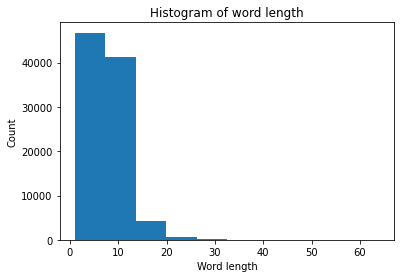

Maximum allow word length= 40
Add padding to "enjoy"="enjoyPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP"


In [ ]:
import matplotlib.pyplot as pl


word_lengths = [len(word) for word in word_to_charindex]
pl.hist(word_lengths)
pl.xlabel('Word length')
pl.ylabel('Count')
pl.title('Histogram of word length')
pl.show()

max_word_len = 40
print('Maximum allow word length=', max_word_len)


def add_paddings(word):
  """Add padding to word if length is less than max len or cut characters after max length."""
  word = word[:max_word_len]
  diff = max_word_len-len(word)
  for x in range(diff):
    word += "P"
  return word


print(f'Add padding to "enjoy"="{add_paddings("enjoy")}"')

**Define batch function**

In [ ]:
import numpy as np
word_ind_dict = {w: i for i, w in enumerate(word_to_charindex)}

# define get batch function for character embedding model
def get_batch_charembed(seq_data, size, iteration):
  """Return a batch of given size from skip gram.
  
    Input: onehot encoding of characters e.g. "b", "e", "s", "t"
    Output: the word e.g. "best"

  Parameter
  ---------
  seq_data: sequence of tokens
  size: batch size
  iteration: num

  Output
  ------
  batch_inputs
  batch_labels

  """
  batch_inputs = []
  batch_labels = []
  start_index = iteration * size
  end_index = (iteration + 1) * size
  keys = list(word_to_charindex.keys())
  for i in range(start_index, end_index):
    tokens = seq_data[i]
    for word in tokens:
      pad_word = add_paddings(word)
      num_list = [char_to_num_dict[x] for x in pad_word if x in char_to_num_dict]
      input_temp = np.zeros((max_word_len, char_len))
      for count, ind in enumerate(num_list):
        input_temp[count, ind] = 1
      batch_inputs.append(input_temp)  # char list
      batch_labels.append(word_ind_dict[word])  # target word
  batch_inputs = np.array(batch_inputs)
  return batch_inputs, np.array(batch_labels)

# quick check
batch_inputs = []
for word in train_text_sm[0]:
  num_list = word_to_charindex[word]
  input_temp = np.zeros((len(num_list), char_len))
  for count, ind in enumerate(num_list):
    input_temp[count, ind] = 1
  batch_inputs.append(input_temp)
np.array(batch_inputs).shape


size = 2
print(f'Try to get a batch of size={size} on iteration=0')
binput, blabel = get_batch_charembed(train_text_sm, size, 0)
print(binput)
print(blabel)
print(f'batch input size = {binput.shape}')


Try to get a batch of size=2 on iteration=0
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0

### 2.2.2. Build Character Embeddings Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

#### Hyperparameters
learning_rate = 0.01
n_hidden = 128
no_of_epochs = 150
n_step = max_word_len
n_input = char_len
n_class = len(word_to_charindex)
dropout = 0.2
batch_size = 10

#### Model
class CharacterEmbed(nn.Module):

  def __init__(self):
    super(CharacterEmbed, self).__init__()
    self.lstm = nn.LSTM(n_input, n_hidden, batch_first=True, bidirectional=True, dropout=dropout)
    self.linear = nn.Linear(n_hidden * 2, n_class)

  def forward(self, sentence):
    lstm_out, (h_n,c_n) = self.lstm(sentence)
    #concat the last hidden state from two direction
    hidden_out =torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
    z = self.linear(hidden_out)
    log_output = F.log_softmax(z, dim=1)
    return log_output


char_embed_model = CharacterEmbed()
criterion = nn.NLLLoss()
optimiser = optim.Adam(char_embed_model.parameters(), lr=learning_rate)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


### 2.1.4. Train Character Embeddings Model

Epoch: 0, loss: 11.4412, train_acc: 0.000
Epoch: 10, loss: 6.4192, train_acc: 0.020
Epoch: 20, loss: 6.1973, train_acc: 0.050
Epoch: 30, loss: 5.7685, train_acc: 0.034
Epoch: 40, loss: 4.8237, train_acc: 0.118
Epoch: 50, loss: 3.7670, train_acc: 0.233
Epoch: 60, loss: 2.6196, train_acc: 0.443
Epoch: 70, loss: 1.7129, train_acc: 0.649
Epoch: 80, loss: 0.9756, train_acc: 0.853
Epoch: 90, loss: 0.5326, train_acc: 0.949
Epoch: 100, loss: 0.2836, train_acc: 0.983
Epoch: 110, loss: 0.1563, train_acc: 0.999
Epoch: 120, loss: 0.0940, train_acc: 1.000
Epoch: 130, loss: 0.0623, train_acc: 1.000
Epoch: 140, loss: 0.0455, train_acc: 1.000



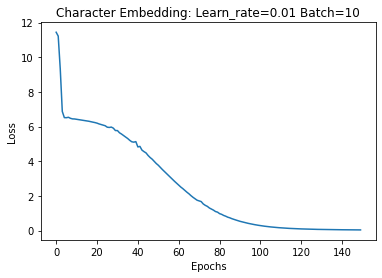

In [ ]:
losses2 = []

for epoch in tqdm(range(no_of_epochs)):
    inputs,labels = get_batch_charembed(train_text_sm, batch_size, no_of_epochs) # make batch every epoch
    inputs_torch = torch.from_numpy(inputs).float()
    labels_torch = torch.from_numpy(labels)

    # 1. zero grad
    optimiser.zero_grad()

    # 2. forword propagation
    outputs = char_embed_model(inputs_torch)

    # 3. calculate loss
    loss = criterion(outputs, labels_torch)

    # 4. back propagation
    loss.backward()
    optimiser.step()
    
    losses2.append(loss)
    if epoch % 10 == 0: 
        pred_outputs = char_embed_model(inputs_torch)
        predicted = torch.argmax(outputs, 1)
        train_acc = accuracy_score(predicted.numpy(), labels)
        print('Epoch: %d, loss: %.4f, train_acc: %.3f' %(epoch, loss, train_acc))

pl.plot(range(no_of_epochs), losses2)
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.title(f'Character Embedding: Learn_rate={learning_rate} Batch={batch_size}')
pl.show()

### 2.1.5. Save Character Embeddings Model

In [ ]:
# mount to my drive
from google.colab import drive
drive.mount('/content/drive')

# save model
char_model_file_name = f'drive/My Drive/character_embedding_lr={learning_rate}_batch={batch_size}.pt'
torch.save(char_embed_model, char_model_file_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CharacterEmbed. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### 2.1.6. Load Character Embeddings Model

In [ ]:
# load model
saved_char_embed_model = torch.load(char_model_file_name)
saved_char_embed_model.eval()

CharacterEmbed(
  (lstm): LSTM(95, 128, batch_first=True, dropout=0.2, bidirectional=True)
  (linear): Linear(in_features=256, out_features=93064, bias=True)
)

## 2.3. Sequence model

### 2.3.1. Apply/Import Word Embedding and Character Embedding Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

In [ ]:
# mount to my drive
from google.colab import drive
drive.mount('/content/drive')

# load pre-trained word embedding model
model_file_name = 'drive/My Drive/word_embedding_lr=0.002_batch=200_embed=25.pt'
saved_skip_gram_model = torch.load(model_file_name)
print(saved_skip_gram_model.eval())

# load pre-trained character embedding model
char_model_file_name = 'drive/My Drive/character_embedding_lr=0.01_batch=10.pt'
saved_char_embed_model = torch.load(char_model_file_name)
print(saved_char_embed_model.eval())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
SkipGram(
  (linear1): Linear(in_features=143366, out_features=25, bias=False)
  (linear2): Linear(in_features=25, out_features=143366, bias=False)
)
CharacterEmbed(
  (lstm): LSTM(95, 128, batch_first=True, dropout=0.2, bidirectional=True)
  (linear): Linear(in_features=256, out_features=93064, bias=True)
)


### 2.3.2. Build Sequence Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

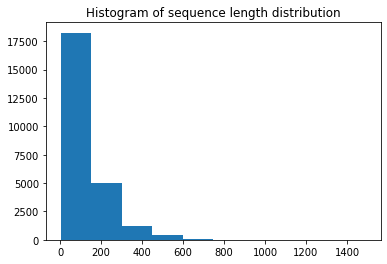

There are 99.86% sequence whose length is less than or equal to max length=600


In [ ]:
# check out sequence length distribution
sequence_lens = [len(tokens) for tokens in train_text_sm]
pl.hist(sequence_lens)
pl.title('Histogram of sequence length distribution')
pl.show()

max_len = 600
quantile = round(len([x for x in sequence_lens if x <= max_len]) / len(sequence_lens) * 100, 2)
print(f'There are {quantile}% sequence whose length is less than or equal to max length={max_len}')

Based on the histogram, we can see almost all sequence length are less than 600 with only few outliers. Hence we can set the maximum input length to be 600.


In [ ]:
# obtain hidden weights of word embedding model
word_weight1 = saved_skip_gram_model.linear1.weight
trained_word_embeddings = word_weight1.detach().T.numpy()

# helper function - retrieve embedding vector for a word given trained embedding
def get_embedding_vector(trained_embeddings, word):
  """Compute similarity score given two words and word embedding."""
  i= word_dict[word]
  embed = trained_embeddings[i]
  return embed


# quick check
test_word = 'enjoy'
test_word_embed_vec = get_embedding_vector(trained_word_embeddings, test_word)
print(f'Word embedding for {test_word}={test_word_embed_vec}\n Shape={test_word_embed_vec.shape}' )

Word embedding for enjoy=[ 0.1773694  -0.17408924  0.18397018 -0.18018363 -0.15502301  0.17706983
  0.17551203  0.18119349 -0.13586627 -0.18078697 -0.16100952  0.14117928
 -0.20514096  0.184316   -0.15940486  0.19345565  0.20464426  0.20103537
 -0.20199361 -0.15718627 -0.17094243  0.17064911 -0.18375415 -0.0189662
  0.16508652]
 Shape=(25,)


In [ ]:
# obtain hidden weights of character embedding model
character_weight1 = saved_char_embed_model.linear.weight
trained_char_embeddings = character_weight1.detach().T.numpy()


# # helper function - retrieve embedding vector for a word given trained embedding
# def get_embedding_vector(trained_embeddings, word):
#   """Compute similarity score given two words and word embedding."""
#   i= word_dict[word]
#   embed = trained_embeddings[i]
#   return embed


# # quick check
# test_word = 'enjoy'
# test_word_embed_vec = get_embedding_vector(trained_word_embeddings, test_word)
# test_char_embed_vec = get_embedding_vector(trained_char_embeddings, test_word)
# print(f'Word embedding for {test_word}={test_word_embed_vec}\n Shape={test_word_embed_vec.shape}' )
# print(f'Character embedding for {test_word}={test_char_embed_vec}\n Shape={test_char_embed_vec.shape}' )








### 2.3.3. Train Sequence Model

In [ ]:
# Please comment your code

### 2.3.4. Save Sequence Model

In [ ]:
# Please comment your code

### 2.3.5. Load Sequence Model

In [ ]:
# Please comment your code

# 3 - Evaluation

(*Please show your empirical evidence*)

## 3.1. Performance Evaluation


You are required to provide the table with precision, recall, f1 of test set.

In [ ]:
# Please comment your code

## 3.2. Hyperparameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.*

In [ ]:
# Please comment your code

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [ ]:
# If you used OOP style, use this section